In [1]:
import pandas as pd 
from sysidentpy.model_structure_selection import FROLS 
from sysidentpy.basis_function._basis_function import Polynomial 
import matplotlib.pyplot as plt
import numpy as np
from sysidentpy.metrics import root_relative_squared_error
import os

dirname = os.getcwd()
Location = dirname + "/data/pump_station_data.parquet"
print(Location)

#Location = "/home/kesting/Industrial-IoT-For-Digitization-Of-Electronic-Assets-Course/Final Project/data/pump_station_data.parquet"

/home/smrobot/Industrial-IoT-For-Digitization-Of-Electronic-Assets-Course/Final Project/data/pump_station_data.parquet


# powerVSspeed

## PUMP 1

/home/smrobot/miniconda3/envs/module3_env/lib/python3.11/site-packages/sysidentpy/utils/deprecation.py:37: FutureWarning: Passing a string to define the estimator will rise an error in v0.4.0. 
 You'll have to use FROLS(estimator=LeastSquares()) instead. 
 The only change is that you'll have to define the estimator first instead of passing a string like 'least_squares'. 
 This change will make easier to implement new estimators and it'll improve code readability.
  warnings.warn(message, FutureWarning)


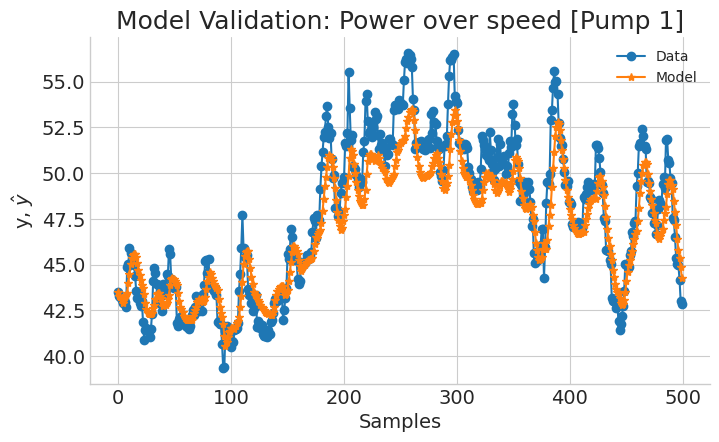

In [2]:
pump_station_data = pd.read_parquet(Location)
pump_station_data.head(5)
pump_station_data_resampled = pump_station_data.resample("1T").mean()
pump_station_data_resampled = pump_station_data_resampled[(pump_station_data_resampled["pump1_rpm"] > 0) & (pump_station_data_resampled["pump4_rpm"] == 0)]

train = pump_station_data_resampled.loc["2023-01-27":"2023-01-30"]
test = pump_station_data_resampled.loc["2023-02-27":"2023-03-02"] 

x_train = train["pump1_rpm"].values.reshape(-1,1)
y_train = train["pump1_power"].values.reshape(-1,1)
x_test = test["pump1_rpm"].values.reshape(-1,1)
y_test = test["pump1_power"].values.reshape(-1,1)

basis_function = Polynomial(degree=1)
estimator = "recursive_least_squares"
model = FROLS(
    order_selection=True,
    n_info_values=7,
    extended_least_squares=False,
    ylag=6,
    xlag=6,
    info_criteria="aic",
    estimator=estimator,
    basis_function=basis_function,
)
model.fit(X=x_train, 
          y=y_train)

yhat = model.predict(X=x_test, 
                     y=y_test,
                     forecast_horizon=60)

from sysidentpy.utils.plotting import plot_residues_correlation, plot_results

plot_results(y=y_test, yhat=yhat, n=500, title="Model Validation: Power over speed [Pump 1]",
    style='seaborn-v0_8-whitegrid',
    facecolor="white",
    figsize=(8,4.5))


In [3]:
residuals = y_test - yhat

# Calculate the mean absolute error
mae = np.mean(np.abs(residuals))

# Calculate the mean squared error
mse = np.mean((residuals) ** 2)

# Calculate the root mean square error
rmse = np.sqrt(mse)

# Calculate the root relative squared error
rrse = root_relative_squared_error(y_test, yhat)

# Print the MAE, MSE, and RMSE with four decimal places
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"RRSE: {rrse:.4f}")

MAE: 1.1952
MSE: 2.4745
RMSE: 1.5731
RRSE: 0.3695


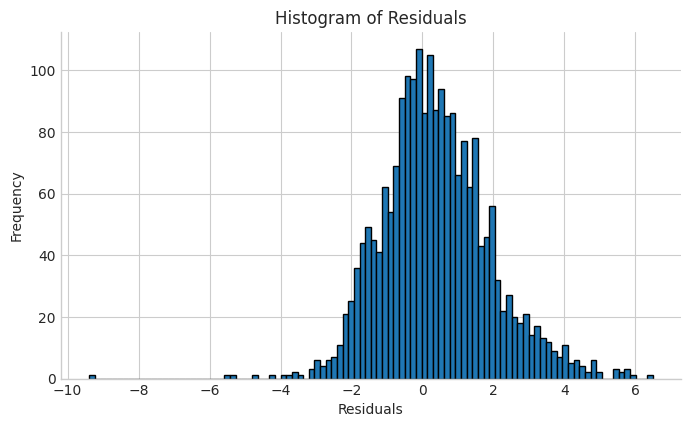

In [4]:

plt.figure(1, figsize=(8,4.5))
# Plotting the histogram of residuals
plt.hist(residuals, bins=100, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.figsize=(16,4)
#plt.xlim(-50,50)
plt.show()
plt.close()

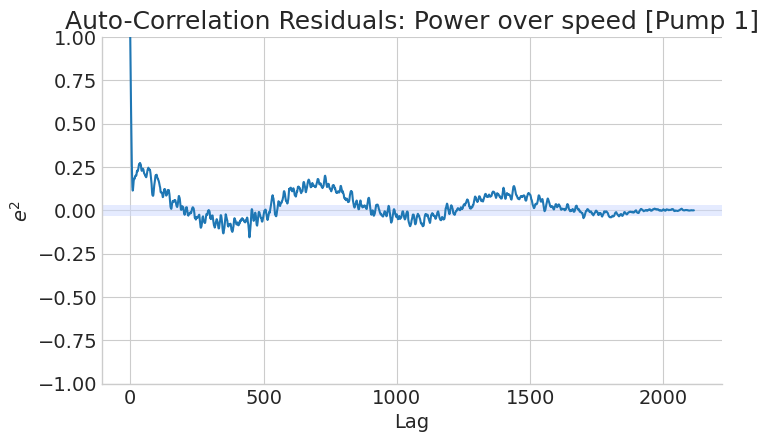

In [5]:
from sysidentpy.utils.plotting import plot_residues_correlation
from sysidentpy.residues.residues_correlation import compute_residues_autocorrelation, compute_cross_correlation

ee = compute_residues_autocorrelation(y_test, yhat)
plot_residues_correlation(data=ee, title="Auto-Correlation Residuals: Power over speed [Pump 1]", ylabel="$e^2$", style='seaborn-v0_8-whitegrid', figsize=(8,4.5))

## PUMP 4

/home/smrobot/miniconda3/envs/module3_env/lib/python3.11/site-packages/sysidentpy/utils/deprecation.py:37: FutureWarning: Passing a string to define the estimator will rise an error in v0.4.0. 
 You'll have to use FROLS(estimator=LeastSquares()) instead. 
 The only change is that you'll have to define the estimator first instead of passing a string like 'least_squares'. 
 This change will make easier to implement new estimators and it'll improve code readability.
  warnings.warn(message, FutureWarning)


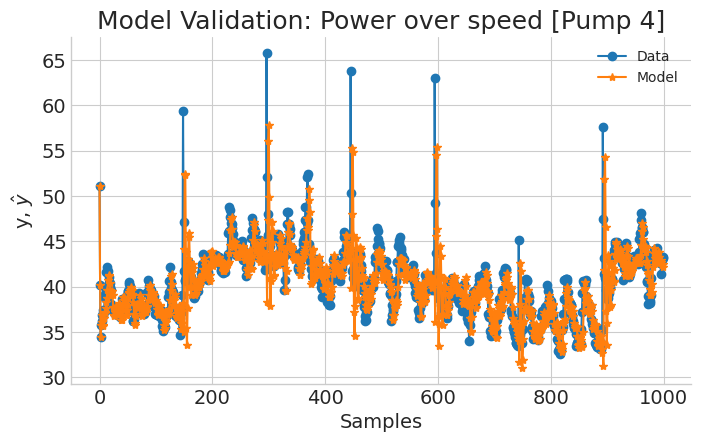

In [6]:
pump_station_data = pd.read_parquet(Location)
pump_station_data.head(5)
pump_station_data_resampled = pump_station_data.resample("1T").mean()
pump_station_data_resampled = pump_station_data_resampled[(pump_station_data_resampled["pump1_rpm"] == 0) & (pump_station_data_resampled["pump4_rpm"] > 0)]

train = pump_station_data_resampled.loc["2023-01-27":"2023-01-30"]
test = pump_station_data_resampled.loc["2023-02-27":"2023-03-02"] 

x_train = train["pump4_rpm"].values.reshape(-1,1)
y_train = train["pump4_power"].values.reshape(-1,1)
x_test = test["pump4_rpm"].values.reshape(-1,1)
y_test = test["pump4_power"].values.reshape(-1,1)

basis_function = Polynomial(degree=1)
estimator = "least_squares"
model = FROLS(
    order_selection=True,
    n_info_values=8,
    extended_least_squares=False,
    ylag=5,
    xlag=5,
    info_criteria="aic",
    estimator=estimator,
    basis_function=basis_function,
)
model.fit(X=x_train, 
          y=y_train)

yhat = model.predict(X=x_test, 
                     y=y_test,
                     forecast_horizon=60)

from sysidentpy.utils.plotting import plot_residues_correlation, plot_results

plot_results(y=y_test, yhat=yhat, n=1000, title="Model Validation: Power over speed [Pump 4]",
    style='seaborn-v0_8-whitegrid',
    facecolor="white",
    figsize=(8,4.5))

In [7]:
residuals = y_test - yhat

# Calculate the mean absolute error
mae = np.mean(np.abs(residuals))

# Calculate the mean squared error
mse = np.mean((residuals) ** 2)

# Calculate the root mean square error
rmse = np.sqrt(mse)

# Calculate the root relative squared error
rrse = root_relative_squared_error(y_test, yhat)

# Print the MAE, MSE, and RMSE with four decimal places
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"RRSE: {rrse:.4f}")

MAE: 1.6437
MSE: 9.2285
RMSE: 3.0378
RRSE: 0.8162


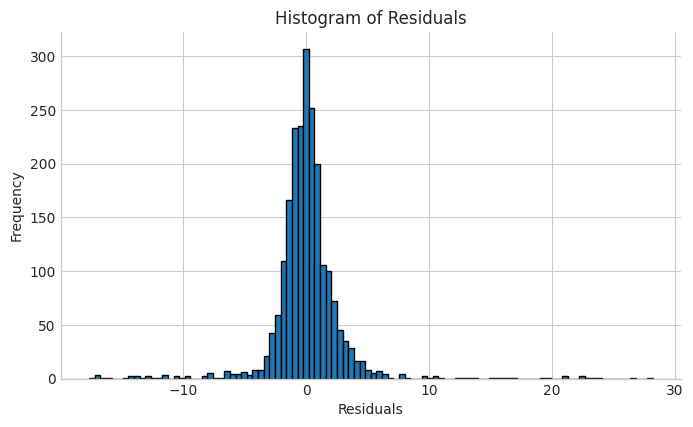

In [8]:

plt.figure(1, figsize=(8,4.5))
# Plotting the histogram of residuals
plt.hist(residuals, bins=100, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
#plt.xlim(-50,50)
plt.show()
plt.close()

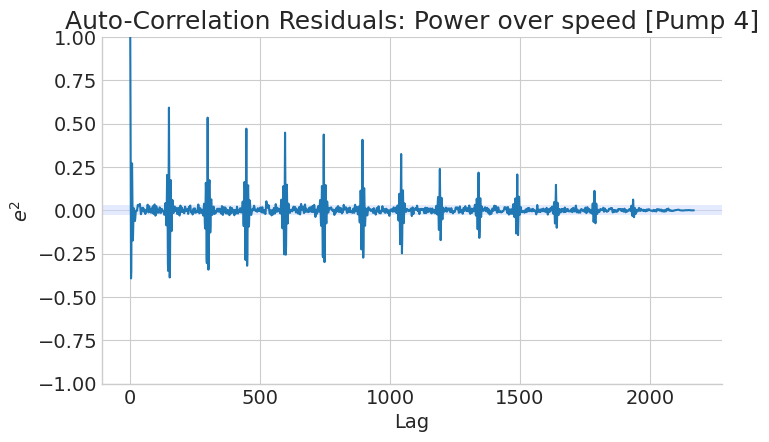

In [9]:
from sysidentpy.utils.plotting import plot_residues_correlation
from sysidentpy.residues.residues_correlation import compute_residues_autocorrelation, compute_cross_correlation

ee = compute_residues_autocorrelation(y_test, yhat)
plot_residues_correlation(data=ee, title="Auto-Correlation Residuals: Power over speed [Pump 4]", ylabel="$e^2$", style='seaborn-v0_8-whitegrid', figsize=(8,4.5))

# speedVSoutflow

## PUMP 1

/home/smrobot/miniconda3/envs/module3_env/lib/python3.11/site-packages/sysidentpy/utils/deprecation.py:37: FutureWarning: Passing a string to define the estimator will rise an error in v0.4.0. 
 You'll have to use FROLS(estimator=LeastSquares()) instead. 
 The only change is that you'll have to define the estimator first instead of passing a string like 'least_squares'. 
 This change will make easier to implement new estimators and it'll improve code readability.
  warnings.warn(message, FutureWarning)
/home/smrobot/miniconda3/envs/module3_env/lib/python3.11/site-packages/sysidentpy/model_structure_selection/forward_regression_orthogonal_least_squares.py:569: UserWarning: n_info_values is greater than the maximum number of all regressors space considering the chosen y_lag, u_lag, and non_degree. We set as 9
  self.info_values = self.information_criterion(reg_matrix, y)


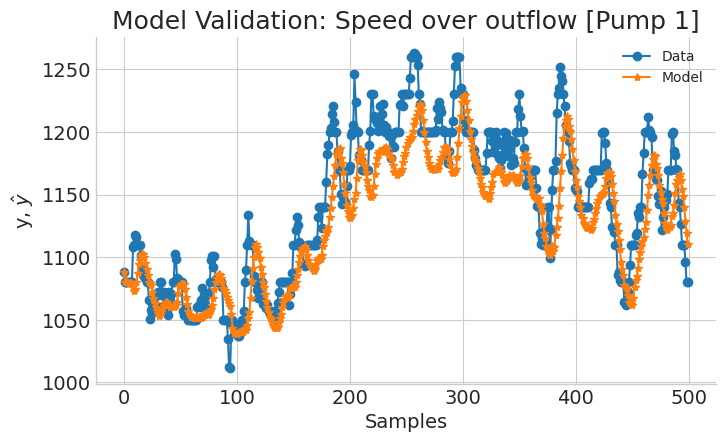

In [10]:
pump_station_data = pd.read_parquet(Location)
pump_station_data.head(5)
pump_station_data_resampled = pump_station_data.resample("1T").mean()
pump_station_data_resampled = pump_station_data_resampled[(pump_station_data_resampled["pump1_rpm"] > 0) & (pump_station_data_resampled["pump4_rpm"] == 0)]

train = pump_station_data_resampled.loc["2023-01-27":"2023-01-30"]
test = pump_station_data_resampled.loc["2023-02-27":"2023-03-02"] 

x_train = train["outflow"].values.reshape(-1,1)
y_train = train["pump1_rpm"].values.reshape(-1,1)
x_test = test["outflow"].values.reshape(-1,1)
y_test = test["pump1_rpm"].values.reshape(-1,1)

basis_function = Polynomial(degree=1)
estimator = "least_squares"
model = FROLS(
    order_selection=True,
    n_info_values= 21,
    extended_least_squares=False,
    ylag=4,
    xlag=4,
    info_criteria="aic",
    estimator=estimator,
    basis_function=basis_function,
)
model.fit(X=x_train, 
          y=y_train)

yhat = model.predict(X=x_test, 
                     y=y_test,
                     forecast_horizon=60)

from sysidentpy.utils.plotting import plot_residues_correlation, plot_results

plot_results(y=y_test, yhat=yhat, n=500, title="Model Validation: Speed over outflow [Pump 1]",
    style='seaborn-v0_8-whitegrid',
    facecolor="white",
    figsize=(8,4.5))


In [11]:
residuals = y_test - yhat

# Calculate the mean absolute error
mae = np.mean(np.abs(residuals))

# Calculate the mean squared error
mse = np.mean((residuals) ** 2)

# Calculate the root mean square error
rmse = np.sqrt(mse)

# Calculate the root relative squared error
rrse = root_relative_squared_error(y_test, yhat)

# Print the MAE, MSE, and RMSE with four decimal places
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"RRSE: {rrse:.4f}")

MAE: 25.4784
MSE: 1118.5720
RMSE: 33.4451
RRSE: 0.5344


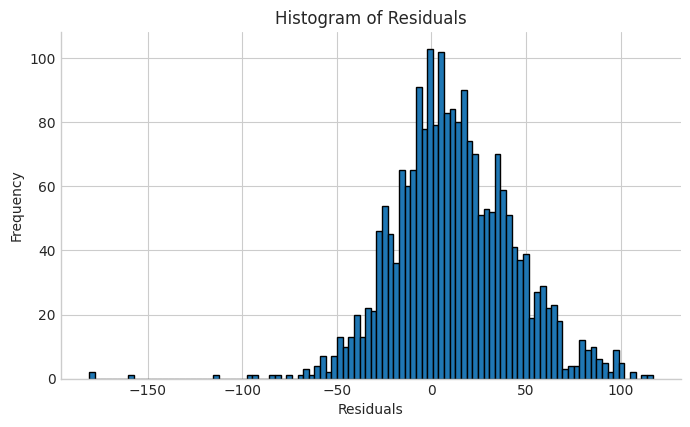

In [12]:
residuals = y_test - yhat
plt.figure(1, figsize=(8,4.5))
# Plotting the histogram of residuals
plt.hist(residuals, bins=100, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
#plt.xlim(-50,50)
plt.show()
plt.close()

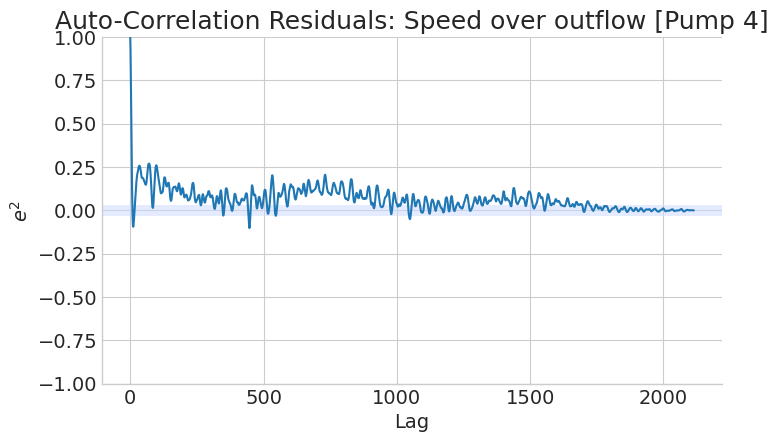

In [13]:
from sysidentpy.utils.plotting import plot_residues_correlation
from sysidentpy.residues.residues_correlation import compute_residues_autocorrelation, compute_cross_correlation

ee = compute_residues_autocorrelation(y_test, yhat)
plot_residues_correlation(data=ee, title="Auto-Correlation Residuals: Speed over outflow [Pump 4]", ylabel="$e^2$", style='seaborn-v0_8-whitegrid', figsize=(8,4.5))

## PUMP 4

/home/smrobot/miniconda3/envs/module3_env/lib/python3.11/site-packages/sysidentpy/utils/deprecation.py:37: FutureWarning: Passing a string to define the estimator will rise an error in v0.4.0. 
 You'll have to use FROLS(estimator=LeastSquares()) instead. 
 The only change is that you'll have to define the estimator first instead of passing a string like 'least_squares'. 
 This change will make easier to implement new estimators and it'll improve code readability.
  warnings.warn(message, FutureWarning)


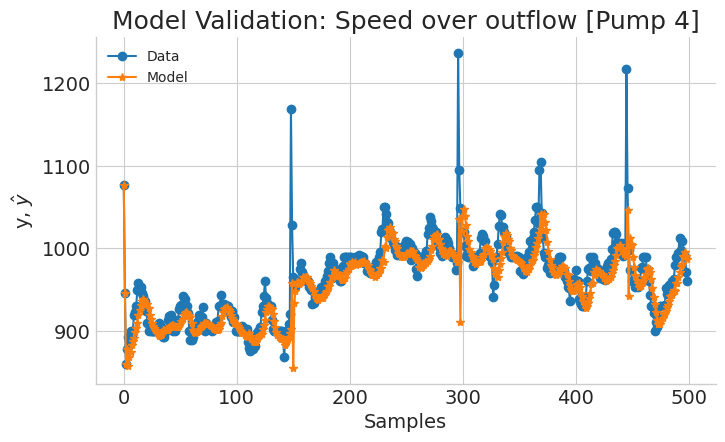

In [14]:
pump_station_data = pd.read_parquet(Location)
pump_station_data.head(5)
pump_station_data_resampled = pump_station_data.resample("1T").mean()
pump_station_data_resampled = pump_station_data_resampled[(pump_station_data_resampled["pump1_rpm"] == 0) & (pump_station_data_resampled["pump4_rpm"] > 0)]

train = pump_station_data_resampled.loc["2023-01-27":"2023-01-30"]
test = pump_station_data_resampled.loc["2023-02-27":"2023-03-02"] 

x_train = train["outflow"].values.reshape(-1,1)
y_train = train["pump4_rpm"].values.reshape(-1,1)
x_test = test["outflow"].values.reshape(-1,1)
y_test = test["pump4_rpm"].values.reshape(-1,1)

basis_function = Polynomial(degree=2)
estimator = "least_squares"
model = FROLS(
    order_selection=True,
    n_info_values=10,
    extended_least_squares=False,
    ylag=4,
    xlag=4,
    info_criteria="aic",
    estimator=estimator,
    basis_function=basis_function,
)
model.fit(X=x_train, 
          y=y_train)

yhat = model.predict(X=x_test, 
                     y=y_test,
                     forecast_horizon=60)

from sysidentpy.utils.plotting import plot_residues_correlation, plot_results

plot_results(y=y_test, yhat=yhat, n=500, title="Model Validation: Speed over outflow [Pump 4]",
    style='seaborn-v0_8-whitegrid',
    facecolor="white",
    figsize=(8,4.5))

In [15]:
residuals = y_test - yhat

# Calculate the mean absolute error
mae = np.mean(np.abs(residuals))

# Calculate the mean squared error
mse = np.mean((residuals) ** 2)

# Calculate the root mean square error
rmse = np.sqrt(mse)

# Calculate the root relative squared error
rrse = root_relative_squared_error(y_test, yhat)

# Print the MAE, MSE, and RMSE with four decimal places
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"RRSE: {rrse:.4f}")

MAE: 15.8877
MSE: 823.2672
RMSE: 28.6926
RRSE: 0.5619


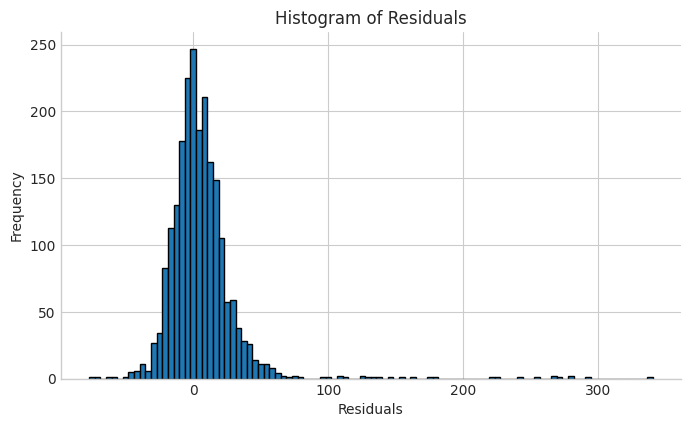

In [16]:
residuals = y_test - yhat
plt.figure(1, figsize=(8,4.5))
# Plotting the histogram of residuals
plt.hist(residuals, bins=100, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
#plt.xlim(-50,50)
plt.show()
plt.close()

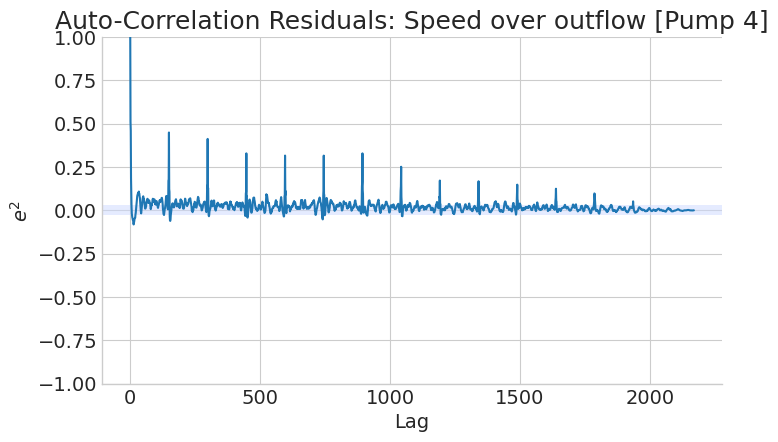

In [17]:
from sysidentpy.utils.plotting import plot_residues_correlation
from sysidentpy.residues.residues_correlation import compute_residues_autocorrelation, compute_cross_correlation

ee = compute_residues_autocorrelation(y_test, yhat)
plot_residues_correlation(data=ee, title="Auto-Correlation Residuals: Speed over outflow [Pump 4]", ylabel="$e^2$", style='seaborn-v0_8-whitegrid', figsize=(8,4.5))

# outflowVSpower

## PUMP 1

/home/smrobot/miniconda3/envs/module3_env/lib/python3.11/site-packages/sysidentpy/utils/deprecation.py:37: FutureWarning: Passing a string to define the estimator will rise an error in v0.4.0. 
 You'll have to use FROLS(estimator=LeastSquares()) instead. 
 The only change is that you'll have to define the estimator first instead of passing a string like 'least_squares'. 
 This change will make easier to implement new estimators and it'll improve code readability.
  warnings.warn(message, FutureWarning)
/home/smrobot/miniconda3/envs/module3_env/lib/python3.11/site-packages/sysidentpy/model_structure_selection/forward_regression_orthogonal_least_squares.py:569: UserWarning: n_info_values is greater than the maximum number of all regressors space considering the chosen y_lag, u_lag, and non_degree. We set as 7
  self.info_values = self.information_criterion(reg_matrix, y)


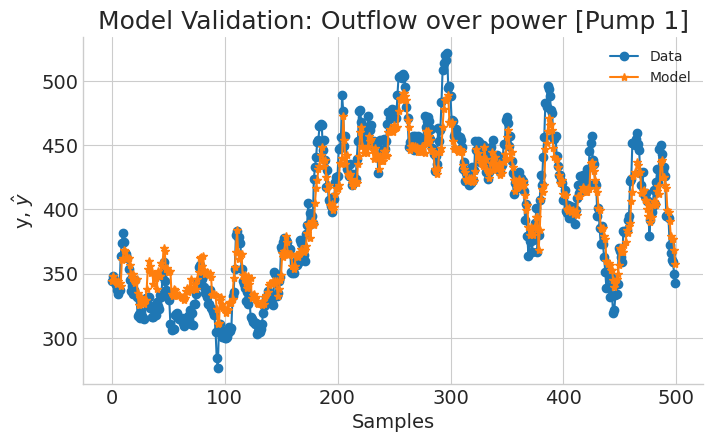

In [18]:
pump_station_data = pd.read_parquet(Location)
pump_station_data.head(5)
pump_station_data_resampled = pump_station_data.resample("1T").mean()
pump_station_data_resampled = pump_station_data_resampled[(pump_station_data_resampled["pump1_rpm"] > 0) & (pump_station_data_resampled["pump4_rpm"] == 0)]

train = pump_station_data_resampled.loc["2023-01-27":"2023-01-30"]
test = pump_station_data_resampled.loc["2023-02-27":"2023-03-02"] 

x_train = train["pump1_power"].values.reshape(-1,1)
y_train = train["outflow"].values.reshape(-1,1)
x_test = test["pump1_power"].values.reshape(-1,1)
y_test = test["outflow"].values.reshape(-1,1)

basis_function = Polynomial(degree=1)
estimator = "recursive_least_squares"
model = FROLS(
    order_selection=True,
    n_info_values=16,
    extended_least_squares=False,
    ylag=3,
    xlag=3,
    info_criteria="aic",
    estimator="least_squares",
    basis_function=basis_function,
)
model.fit(X=x_train, 
          y=y_train)


yhat = model.predict(X=x_test, 
                     y=y_test,
                     forecast_horizon=60)

from sysidentpy.utils.plotting import plot_residues_correlation, plot_results

plot_results(y=y_test, yhat=yhat, n=500, title="Model Validation: Outflow over power [Pump 1]",
    style='seaborn-v0_8-whitegrid',
    facecolor="white",
    figsize=(8,4.5))

from sysidentpy.utils.display_results import results

In [19]:
residuals = y_test - yhat

# Calculate the mean absolute error
mae = np.mean(np.abs(residuals))

# Calculate the mean squared error
mse = np.mean((residuals) ** 2)

# Calculate the root mean square error
rmse = np.sqrt(mse)

# Calculate the root relative squared error
rrse = root_relative_squared_error(y_test, yhat)

# Print the MAE, MSE, and RMSE with four decimal places
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"RRSE: {rrse:.4f}")


MAE: 13.7036
MSE: 342.5392
RMSE: 18.5078
RRSE: 0.3142


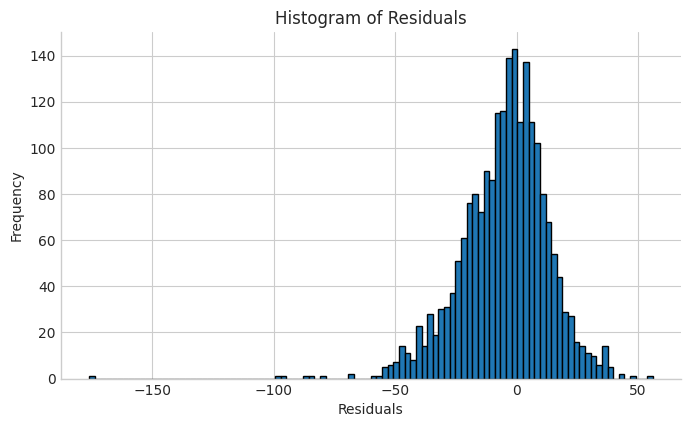

In [20]:
residuals = y_test - yhat
plt.figure(1, figsize=(8,4.5))
# Plotting the histogram of residuals
plt.hist(residuals, bins=100, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
#plt.xlim(-50,50)
plt.show()
plt.close()

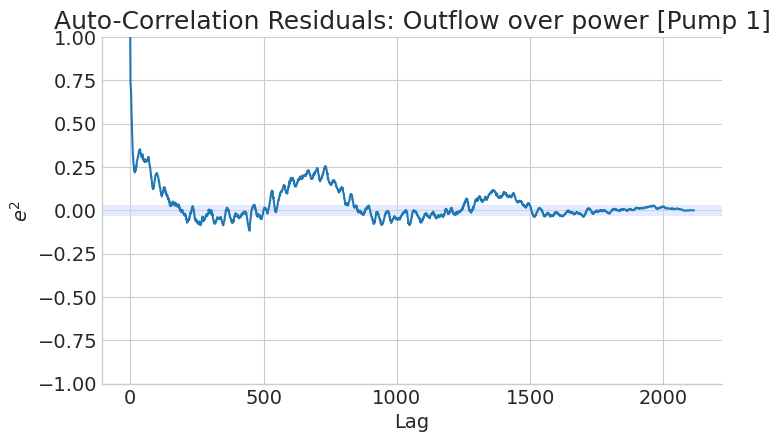

In [21]:
from sysidentpy.utils.plotting import plot_residues_correlation
from sysidentpy.residues.residues_correlation import compute_residues_autocorrelation, compute_cross_correlation

ee = compute_residues_autocorrelation(y_test, yhat)
plot_residues_correlation(data=ee, title="Auto-Correlation Residuals: Outflow over power [Pump 1]", ylabel="$e^2$", style='seaborn-v0_8-whitegrid', figsize=(8,4.5))

## PUMP 4

/home/smrobot/miniconda3/envs/module3_env/lib/python3.11/site-packages/sysidentpy/utils/deprecation.py:37: FutureWarning: Passing a string to define the estimator will rise an error in v0.4.0. 
 You'll have to use FROLS(estimator=LeastSquares()) instead. 
 The only change is that you'll have to define the estimator first instead of passing a string like 'least_squares'. 
 This change will make easier to implement new estimators and it'll improve code readability.
  warnings.warn(message, FutureWarning)
/home/smrobot/miniconda3/envs/module3_env/lib/python3.11/site-packages/sysidentpy/model_structure_selection/forward_regression_orthogonal_least_squares.py:569: UserWarning: n_info_values is greater than the maximum number of all regressors space considering the chosen y_lag, u_lag, and non_degree. We set as 11
  self.info_values = self.information_criterion(reg_matrix, y)


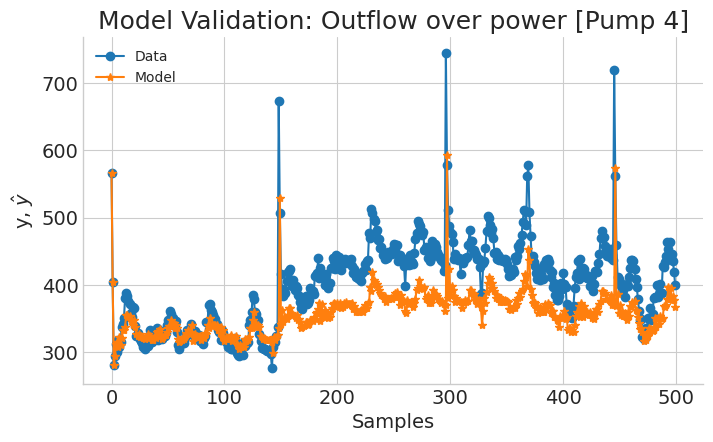

In [22]:
pump_station_data = pd.read_parquet(Location)
pump_station_data.head(5)
pump_station_data_resampled = pump_station_data.resample("1T").mean()
pump_station_data_resampled = pump_station_data_resampled[(pump_station_data_resampled["pump1_rpm"] == 0) & (pump_station_data_resampled["pump4_rpm"] > 0)]

train = pump_station_data_resampled.loc["2023-01-27":"2023-01-30"]
test = pump_station_data_resampled.loc["2023-02-27":"2023-03-02"] 

x_train = train["pump4_power"].values.reshape(-1,1)
y_train = train["outflow"].values.reshape(-1,1)
x_test = test["pump4_power"].values.reshape(-1,1)
y_test = test["outflow"].values.reshape(-1,1)

basis_function = Polynomial(degree=1)
estimator = "recursive_least_squares"
model = FROLS(
    order_selection=True,
    n_info_values=12,
    extended_least_squares=False,
    ylag=5,
    xlag=5,
    info_criteria="aic",
    estimator=estimator,
    basis_function=basis_function,
)
model.fit(X=x_train, 
          y=y_train)


yhat = model.predict(X=x_test, 
                     y=y_test,
                     forecast_horizon=60)

from sysidentpy.utils.plotting import plot_residues_correlation, plot_results

plot_results(y=y_test, yhat=yhat, n=500, title="Model Validation: Outflow over power [Pump 4]",
    style='seaborn-v0_8-whitegrid',
    facecolor="white",
    figsize=(8,4.5))


In [23]:

residuals = y_test - yhat

# Calculate the mean absolute error
mae = np.mean(np.abs(residuals))

# Calculate the mean squared error
mse = np.mean((residuals) ** 2)

# Calculate the root mean square error
rmse = np.sqrt(mse)

# Calculate the root relative squared error
rrse = root_relative_squared_error(y_test, yhat)

# Print the MAE, MSE, and RMSE with four decimal places
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"RRSE: {rrse:.4f}")


MAE: 41.5294
MSE: 2862.1835
RMSE: 53.4994
RRSE: 0.7873


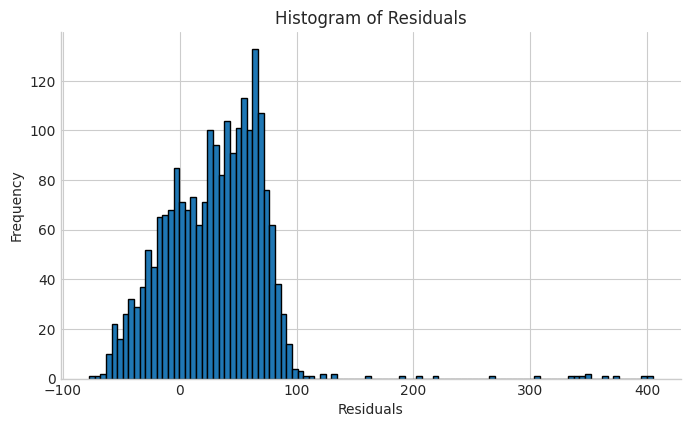

In [24]:
residuals = y_test - yhat
plt.figure(1, figsize=(8,4.5))
# Plotting the histogram of residuals
plt.hist(residuals, bins=100, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
#plt.xlim(-50,50)
plt.show()
plt.close()

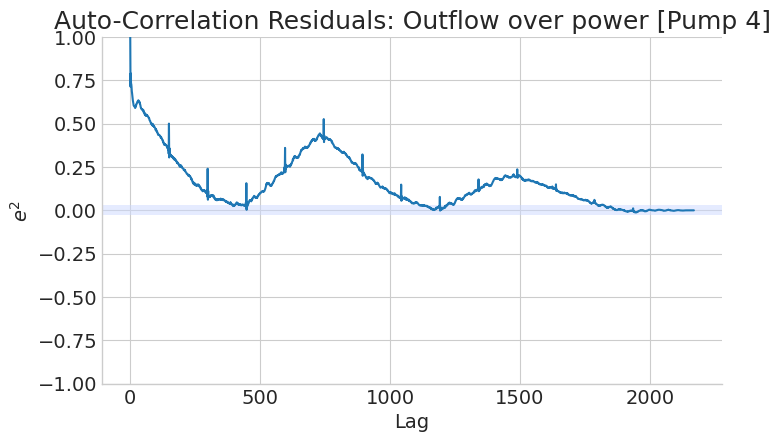

In [25]:
from sysidentpy.utils.plotting import plot_residues_correlation
from sysidentpy.residues.residues_correlation import compute_residues_autocorrelation, compute_cross_correlation

ee = compute_residues_autocorrelation(y_test, yhat)
plot_residues_correlation(data=ee, title="Auto-Correlation Residuals: Outflow over power [Pump 4]", ylabel="$e^2$", style='seaborn-v0_8-whitegrid', figsize=(8,4.5))